File: geneexpdata_analysis.ipynb

Authors: Eric Mazlumyan, Isaac Brooks-Church

Date: March 2023

Description: Data analysis including principal component analysis of data from 2007 BMC Systems Biology article “Simultaneous clustering of gene expression data with clinical chemistry and pathological evaluations reveals phenotypic prototypes” by Bushel et al

Article citation: Bushel, P.R., Wolfinger, R.D. & Gibson, G. Simultaneous clustering of gene expression data with clinical chemistry and pathological evaluations reveals phenotypic prototypes. BMC Syst Biol 1, 15 (2007). https://doi.org/10.1186/1752-0509-1-15

Article link: https://doi.org/10.1186/1752-0509-1-15

## Table of Contents:

* Conducting PCA on the Gene Expression Data
* Conducting PCA and K-means Clustering on Liver Condition Data
* Transforming Rat Serum Level Data to Enable Elucidation of Trends

In [1]:
# import all data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Conducting PCA on the Gene Expression Data

In [2]:
# Data matrix with genes as rows and samples as columns
genedataimported = pd.read_csv('geneexpdata_import.csv') # import gene expression data 
genedataimported = genedataimported.applymap(lambda a: float(str(a).replace(',', ''))) # remove the commas in the data since for some reason python interprets commas a string
geneexpdata = np.array(genedataimported) # convert to array



In [3]:
# Mean-center the gene expression data
geneexpdata_centered = geneexpdata-np.mean(geneexpdata,axis=1).reshape(len(geneexpdata),1)



In [4]:
# Determine covariance matrix of gene expression data matrix
geneexpdata_cov = np.cov(geneexpdata_centered)


In [5]:
# Find the eigenvalues and eigenvectors from the covariance matrix
evals, evecs = np.linalg.eig(geneexpdata_cov)


In [6]:
# Organize the eigenvalues and eigenvectors
indexvec = evals.argsort()[::-1]
evals = evals[indexvec] # Put the eigenvalues in numerical order from greatest to least
evecs = evecs[:,indexvec] # Order the eigenvectors by the order of the associated eigenvalues


In [7]:
# Reproject the gene expression data
geneexpdata_reproj = np.dot(np.transpose(evecs), geneexpdata_centered)

C:\Users\isaac\anaconda3\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


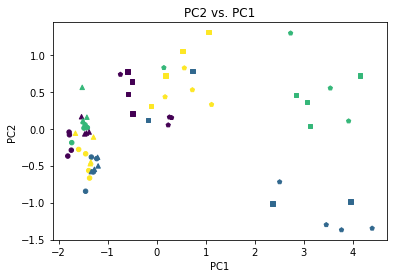

In [8]:
# Data reprojected onto first two principal components is plotted
# PC1 captures variance of treatment duration; PC2 captures variance of gene expression

# Each duration is attributed a corresponding color
# 0 represents 6 duration hours, 1 represents 18 duration hours, 2 represents 24 duration hours, 3 represents 48 duration hours
group1 = [0,0,1,1,2,2,3,3,3,0,0,1,1,2,2,3]
group2 = [0,0,1,2,2,3,3,3,0,0,1,1,1,2,2,3]
group3 = [0,0,1,1,1,2,3,3,0,0,1,2,2,2,3,3]
group4 = [0,0,1,1,2,2,3,3,0,0,1,1,2,2,3,3]
# Each dosage is attributed a corresponding shape
# Circles represent 50 mg/kg
plt.scatter(geneexpdata_reproj[0,0:16], geneexpdata_reproj[1,0:16], c=group1, marker ='o', s=20)
# Triangles represent 150 mg/kg
plt.scatter(geneexpdata_reproj[0,16:32], geneexpdata_reproj[1,16:32], c=group2, marker ='^', s=20)
# Squares represent 1500 mg/kg
plt.scatter(geneexpdata_reproj[0,32:48], geneexpdata_reproj[1,32:48], c=group3, marker='s', s=20)
# Pentagons represent 2000 mg/kg
plt.scatter(geneexpdata_reproj[0,48:64], geneexpdata_reproj[1,48:64], c=group4, marker ='p', s=20)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC2 vs. PC1')
plt.show()

In [9]:
# Reorganize the reprojected gene expression data by number of duration hours

# Initialize vectors that will be used to plot the principal components
geneexpdata_reproj_reorg_pc1 = []
geneexpdata_reproj_reorg_pc2 = []

# Reorganize with regards to 6 duration hours
for i in range(len(geneexpdata_reproj[0])):
    
    if i == 0 or i == 1 or i == 9 or i == 10 or i == 16 or i == 17 or i == 24 or i == 25 or i == 32 or i == 33 or i == 40 or i == 41 or i == 48 or i == 49 or i == 56 or i == 57:
        
        geneexpdata_reproj_reorg_pc1 = np.append(geneexpdata_reproj_reorg_pc1,geneexpdata_reproj[0,i])
        geneexpdata_reproj_reorg_pc2 = np.append(geneexpdata_reproj_reorg_pc2,geneexpdata_reproj[1,i])

# Reorganize with regards to 18 duration hours
for i in range(len(geneexpdata_reproj[0])):
    
    if i == 2 or i == 3 or i == 11 or i == 12 or i == 18 or i == 26 or i == 27 or i == 28 or i == 34 or i == 35 or i == 36 or i == 42 or i == 50 or i == 51 or i == 58 or i == 59:
        
        geneexpdata_reproj_reorg_pc1 = np.append(geneexpdata_reproj_reorg_pc1,geneexpdata_reproj[0,i])
        geneexpdata_reproj_reorg_pc2 = np.append(geneexpdata_reproj_reorg_pc2,geneexpdata_reproj[1,i])
        
# Reorganize with regards to 24 duration hours
for i in range(len(geneexpdata_reproj[0])):
    
    if i == 4 or i == 5 or i == 13 or i == 14 or i == 19 or i == 20 or i == 29 or i == 30 or i == 37 or i == 43 or i == 44 or i == 45 or i == 52 or i == 53 or i == 60 or i == 61:
        
        geneexpdata_reproj_reorg_pc1 = np.append(geneexpdata_reproj_reorg_pc1,geneexpdata_reproj[0,i])
        geneexpdata_reproj_reorg_pc2 = np.append(geneexpdata_reproj_reorg_pc2,geneexpdata_reproj[1,i])
        
# Reorganize with regards to 48 duration hours
for i in range(len(geneexpdata_reproj[0])):
    
    if i == 6 or i == 7 or i == 8 or i == 15 or i == 21 or i == 22 or i == 23 or i == 31 or i == 38 or i == 39 or i == 46 or i == 47 or i == 54 or i == 55 or i == 62 or i == 63:
        
        geneexpdata_reproj_reorg_pc1 = np.append(geneexpdata_reproj_reorg_pc1,geneexpdata_reproj[0,i])
        geneexpdata_reproj_reorg_pc2 = np.append(geneexpdata_reproj_reorg_pc2,geneexpdata_reproj[1,i])
        





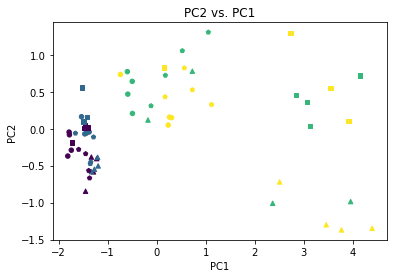

In [10]:
# Data reprojected onto first two principal components is plotted
# PC1 captures variance of dosage; PC2 captures variance of gene expression

# Each dosage is attributed a corresponding color
# 0 represents 50 mg/kg, 1 represents 150 mg/kg, 2 represents 1500 mg/kg, 3 represents 2000 mg/kg
group = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]

# Each treatment duration is attributed a corresponding shape
# Circles represent 6 duration hours
plt.scatter(geneexpdata_reproj_reorg_pc1[0:16], geneexpdata_reproj_reorg_pc2[0:16], c=group, marker ='o', s=20)
# Triangles represent 18 duration hours
plt.scatter(geneexpdata_reproj_reorg_pc1[16:32], geneexpdata_reproj_reorg_pc2[16:32], c=group, marker ='^', s=20)
# Squares represent 24 duration hours
plt.scatter(geneexpdata_reproj_reorg_pc1[32:48], geneexpdata_reproj_reorg_pc2[32:48], c=group, marker ='s', s=20)
# Pentagons represent 48 duration hours
plt.scatter(geneexpdata_reproj_reorg_pc1[48:64], geneexpdata_reproj_reorg_pc2[48:64], c=group, marker ='p', s=20)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC2 vs. PC1')
plt.show()

# Conducting PCA and K-means Clustering on Liver Condition Data

### Conducting PCA on Liver Condition Data

In [11]:
# Data matrix with liver condition type as rows and samples as columns
# The contents of the data matrix represent liver condition severity
# 0 represents no severity, 1 represents minimal severity, 2 represents mild severity, 3 represents moderate severity, 4 represents marked severity
# liverdata was manually imported (see liverconditiondata.csv for the data table)

liverdata = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,0,0,0,0,1,1,2,1,0,0,0,0,0,0,1,2,0,0,0,0,0,0,3,2],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,2,0,0,0,2,2,2,1,1,0,0,1,3,3,3,3,2,0,0,3,1,0,2,1,2],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,1,0,1,1,1,2,0,0,0,0,0,0,1,2,0,0,0,0,1,0,3,2],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,2,3,2,0,0,1,2,2,3,1,2,0,0,4,3,3,3,3,2,0,0,3,0,1,3,2,3],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,3,0,2,2,0,0,0,3,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,0,0,1,2,1,2,0,1,0,0,0,3,4,3,2,0,0,0,1,0,0,3,0,3]])






In [12]:
# Mean-center the liver condition data
liverdata_centered = liverdata-np.mean(liverdata,axis=1).reshape(len(liverdata),1)



In [13]:
# Determine covariance matrix of liver condition data matrix
liverdata_cov = np.cov(liverdata_centered)

In [14]:
# Find the eigenvalues and eigenvectors from the covariance matrix
eigenvals, eigenvecs = np.linalg.eig(liverdata_cov)


In [15]:
# Organize the eigenvalues and eigenvectors
idxvec = eigenvals.argsort()[::-1]
eigenvals = eigenvals[idxvec] # Put the eigenvalues in numerical order from greatest to least
eigenvecs = eigenvecs[:,idxvec] # Order the eigenvectors by the order of the associated eigenvalues



In [16]:
# Reproject the liver condition data
liverdata_reproj = np.dot(np.transpose(eigenvecs), liverdata_centered)



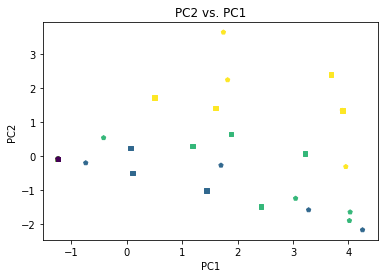

In [17]:
# Data reprojected onto first two principal components is plotted
# PC1 captures variance of treatment duration; PC2 captures variance of liver condition severity

# Each duration is attributed a corresponding color
# 0 represents 6 duration hours, 1 represents 18 duration hours, 2 represents 24 duration hours, 3 represents 48 duration hours
group1 = [0,0,1,1,2,2,3,3,3,0,0,1,1,2,2,3]
group2 = [0,0,1,2,2,3,3,3,0,0,1,1,1,2,2,3]
group3 = [0,0,1,1,1,2,3,3,0,0,1,2,2,2,3,3]
group4 = [0,0,1,1,2,2,3,3,0,0,1,1,2,2,3,3]
# Each dosage is attributed a corresponding shape
# Circles represent 50 mg/kg
plt.scatter(liverdata_reproj[0,0:16], liverdata_reproj[1,0:16], c=group1, marker ='o', s=20)
# Triangles represent 150 mg/kg
plt.scatter(liverdata_reproj[0,16:32], liverdata_reproj[1,16:32], c=group2, marker ='^', s=20)
# Squares represent 1500 mg/kg
plt.scatter(liverdata_reproj[0,32:48], liverdata_reproj[1,32:48], c=group3, marker='s', s=20)
# Pentagons represent 2000 mg/kg
plt.scatter(liverdata_reproj[0,48:64], liverdata_reproj[1,48:64], c=group4, marker ='p', s=20)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC2 vs. PC1')
plt.show()






### Performing K-means Clustering on Liver Condition Data After PCA

In [18]:
from sklearn.cluster import KMeans

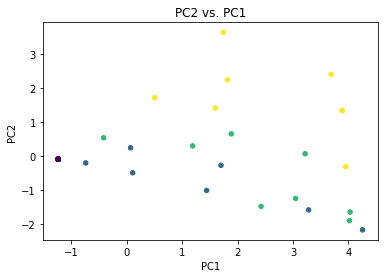

In [19]:
# Data reprojected onto first two principal components is plotted
# PC1 captures variance of treatment duration; PC2 captures variance of liver condition severity

# Each duration is attributed a corresponding color
# 0 represents 6 duration hours, 1 represents 18 duration hours, 2 represents 24 duration hours, 3 represents 48 duration hours
grouping = [0,0,1,1,2,2,3,3,3,0,0,1,1,2,2,3,
            0,0,1,2,2,3,3,3,0,0,1,1,1,2,2,3,
            0,0,1,1,1,2,3,3,0,0,1,2,2,2,3,3,
            0,0,1,1,2,2,3,3,0,0,1,1,2,2,3,3]

# Plot to only visualize treatment duration and liver condition severity
plt.scatter(liverdata_reproj[0,:], liverdata_reproj[1,:], c=grouping, marker = 'o', s=20)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC2 vs. PC1')
plt.show()




C:\Users\isaac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


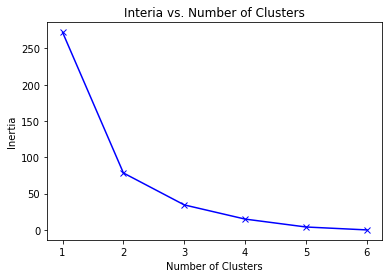

In [20]:
# Determine the optimal number of clusters to apply to the data using the elbow method
# The elbow method visualizes at which point inertia lessens its decline the most to determine optimal cluster number
# Inertia is a measure of distance between data points and cluster center

# Initialize vector to record values for inertia
inertia = []

# For each cluster number, record the value for inertia
for i in range(1,7):
    kmeans = KMeans(n_clusters=i) # Use a particular number of clusters
    kmeans.fit(liverdata_reproj) # Apply the data after PCA was done
    inertia.append(kmeans.inertia_) # Record the value for inertia

# Plot to find optimal cluster number
plt.plot(np.array(range(1,7)),inertia,'bx-')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Interia vs. Number of Clusters')
plt.show()




In [21]:
# Use the optimal cluster number of 2 for K-means clustering 
kmeans = KMeans(n_clusters=2)
# Apply the data after PCA was done
kmeans.fit(liverdata_reproj)






KMeans(n_clusters=2)

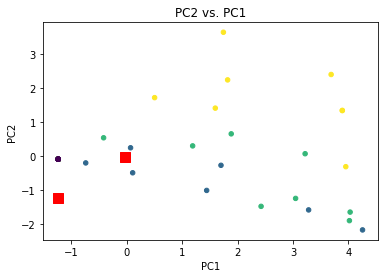

In [22]:
# Data reprojected onto first two principal components is plotted
# PC1 captures variance of treatment duration; PC2 captures variance of liver condition severity

# Each duration is attributed a corresponding color
# 0 represents 6 duration hours, 1 represents 18 duration hours, 2 represents 24 duration hours, 3 represents 48 duration hours
grouping = [0,0,1,1,2,2,3,3,3,0,0,1,1,2,2,3,
            0,0,1,2,2,3,3,3,0,0,1,1,1,2,2,3,
            0,0,1,1,1,2,3,3,0,0,1,2,2,2,3,3,
            0,0,1,1,2,2,3,3,0,0,1,1,2,2,3,3]

# Plot to visualize treatment duration and liver condition severity
plt.scatter(liverdata_reproj[0,:], liverdata_reproj[1,:], c=grouping, marker = 'o', s=20)
# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='r',marker='s',s=100)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC2 vs. PC1')
plt.show()




# Transforming Rat Serum Level Data to Enable Elucidation of Trends

In [23]:
# before importing data sort in sheets by time and then by dose group to get proper sorting 
df = pd.read_csv('Actual_Rat_alt_data_import - Sheet1.csv') # import serum levels 
df = df.applymap(lambda x: float(str(x).replace(',', ''))) # remove the commas in the data since for some reason python interprets commas a string
alt_data = np.array(df) # convert to array
num_rows, num_cols = alt_data.shape # create variables which will be used to iterate across

In [24]:
t = [6,6,6,6,18,18,18,18,24,24,24,24,48,48,48,48] # create time list
t = np.array(t) # make into array
# create list for graph labels
labelsyaxis = ['BUN(mg/dL)', 'Creat(mg/dL)','TP(g/dL)','ALB(g/dL)','ALT(IU/L)','SDH(IU/L)','AST(IU/L)','ALP(IU/L)','TBA(umol/L)','Cholesterol(mg/dL)']

<function matplotlib.pyplot.show(close=None, block=None)>

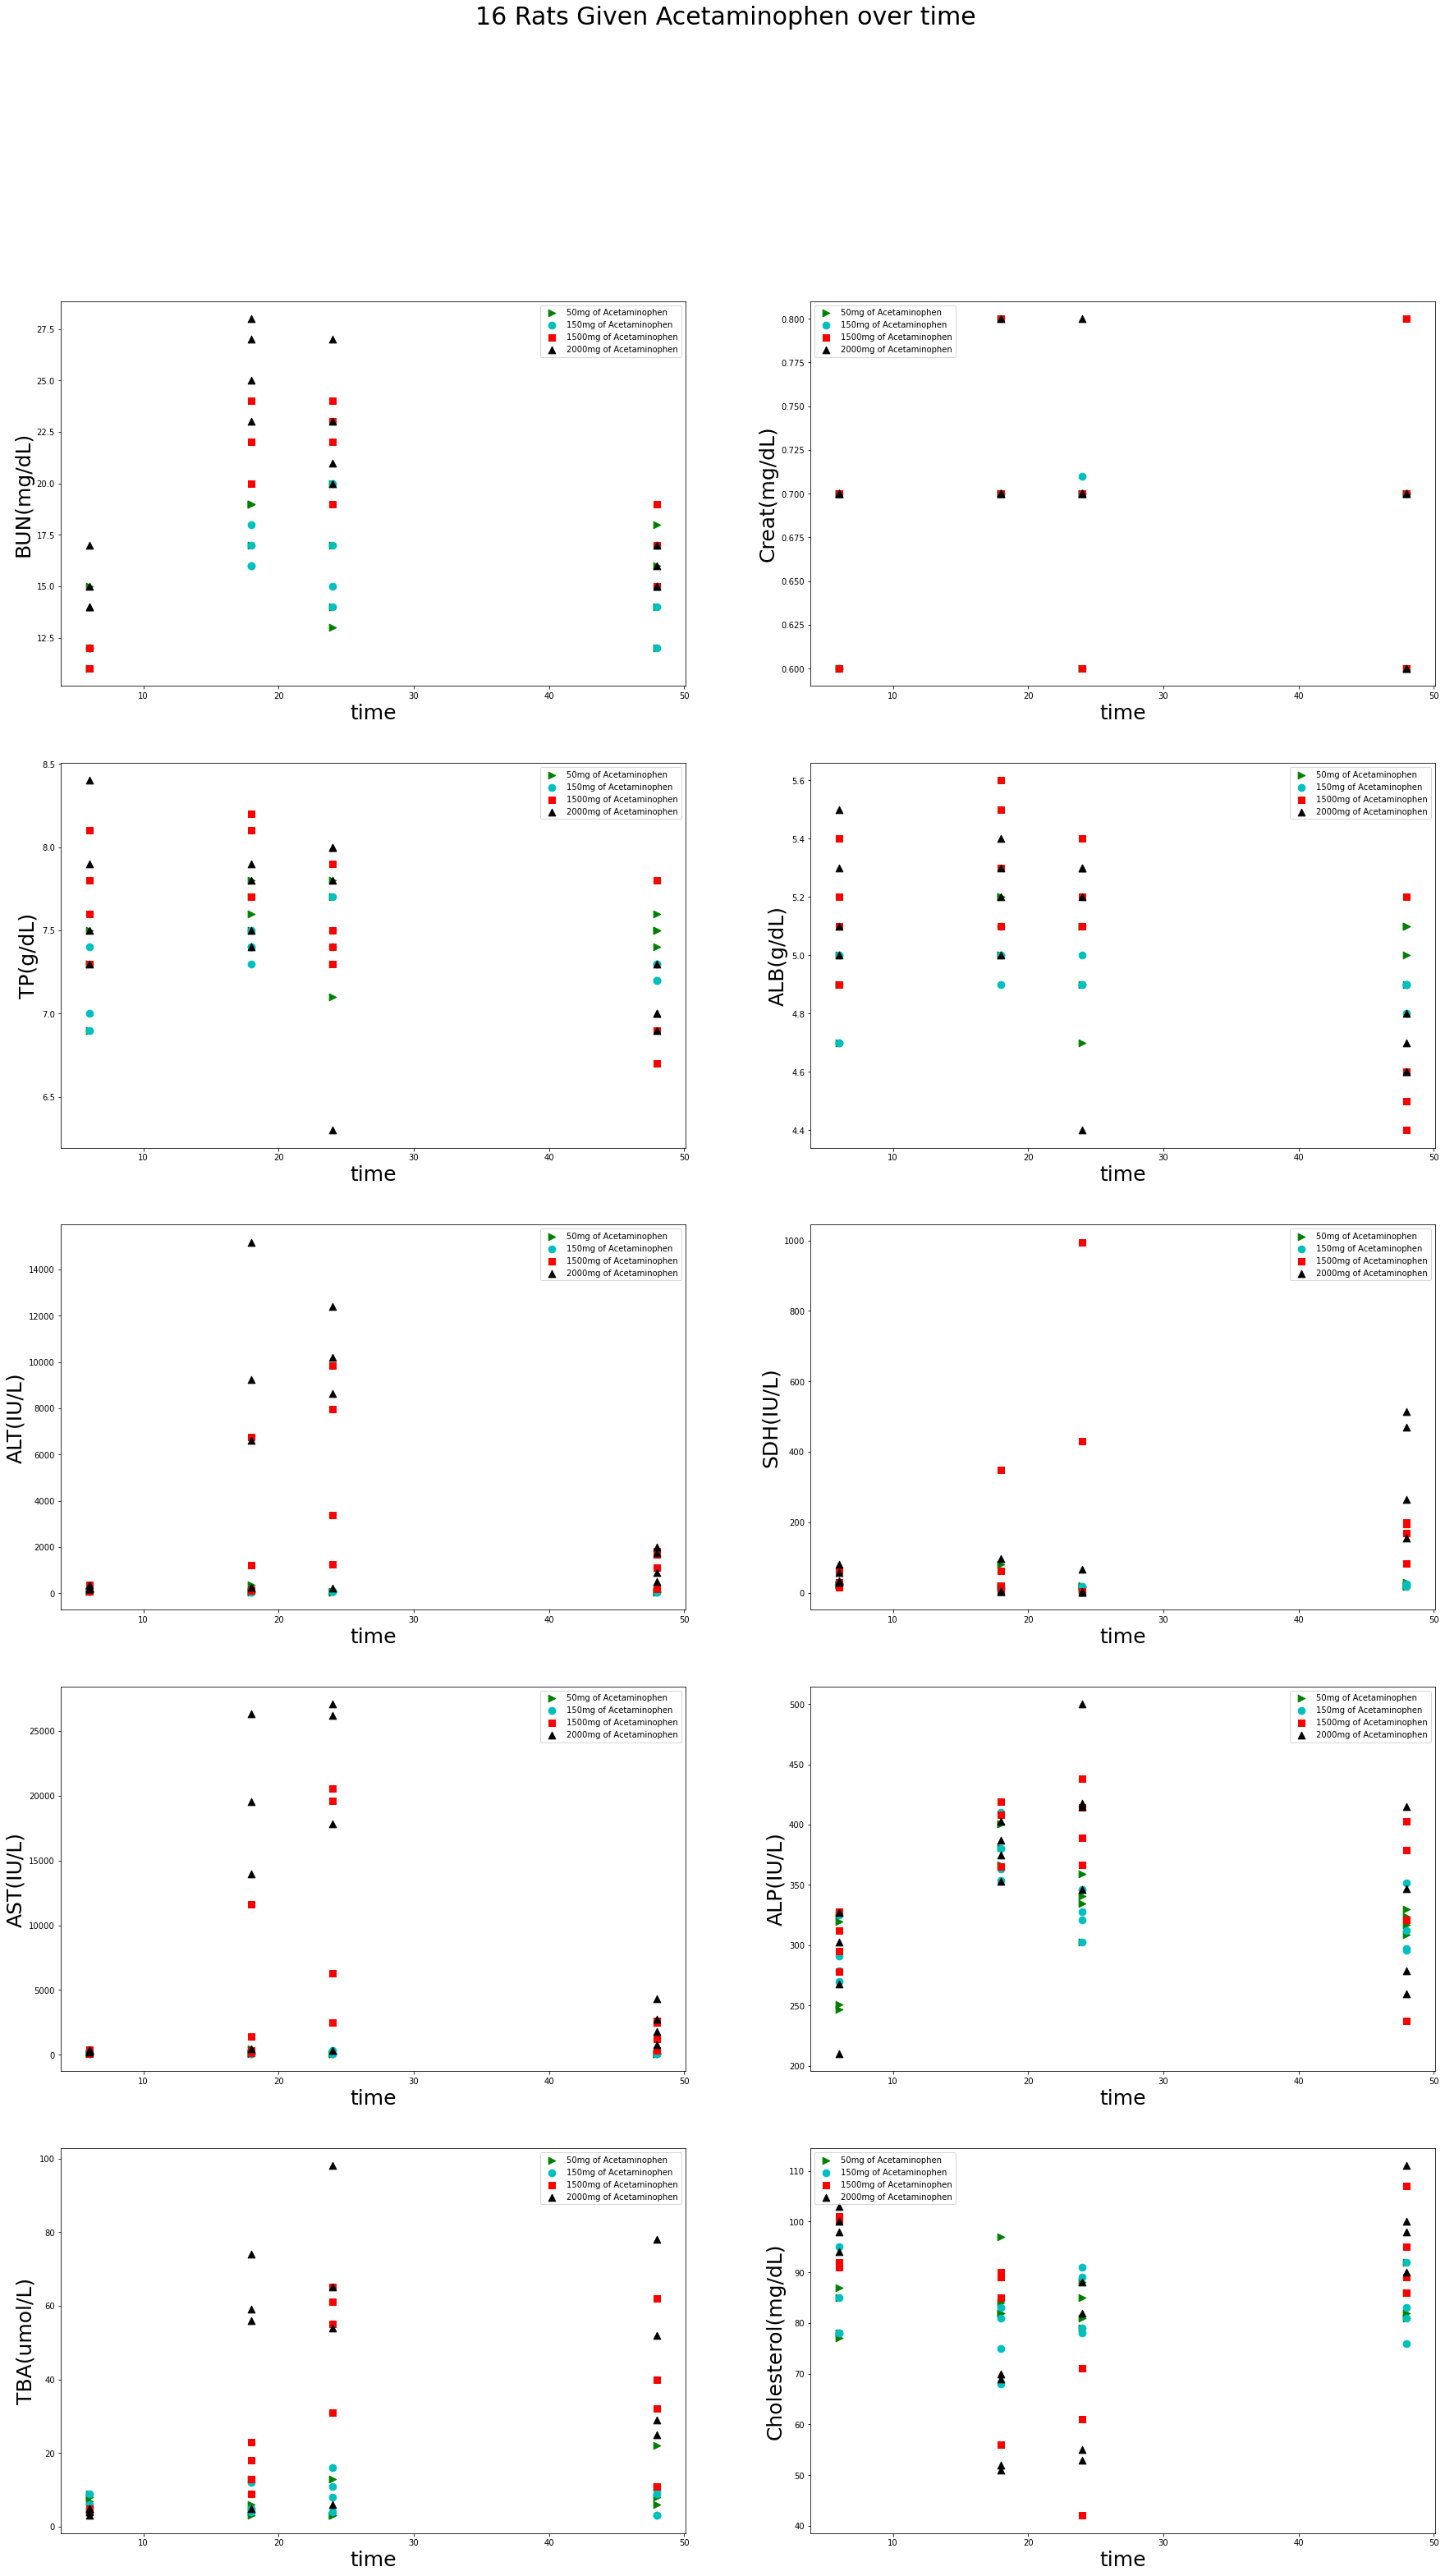

In [25]:
plt.figure(figsize = (30,50)) # good size 
for i in range(num_cols): # iterate through the columns which are the different serum levels, each column is a new graph
    plt.subplot(5,2,i+1) # subplots
    plt.scatter(t, alt_data[48:64,i], marker = '>', color = 'g', s=75,label='50mg of Acetaminophen') 
    plt.scatter(t, alt_data[0:16,i], marker = 'o', color = 'c',s=75,label='150mg of Acetaminophen')
    plt.scatter(t, alt_data[16:32,i], marker = ',', color = 'r',s=75,label ='1500mg of Acetaminophen')
    plt.scatter(t, alt_data[32:48,i], marker = '^', color = 'k',s=75,label='2000mg of Acetaminophen')
    
    
    plt.legend() 
    plt.ylabel(labelsyaxis[i], fontsize = 25 )
    plt.xlabel('time', fontsize = 25)
    
plt.suptitle('16 Rats Given Acetaminophen over time', fontsize = 30)
plt.legend()
plt.show


In [26]:
# creating average values of each time period across the rats from that specific time period and dose 
# this will mean that all 4 rats (from that time period and dose group (eg. 4 rats who were given 150mg measured at 18 hours) will have their serum averaged to observe general trends)

averaged_data = np.zeros((16, 10)) # create empty vector for storing values

for j in range(10):
    row_count = 0 # create way to store rows for condensed data matrix 
    for i in range(0, 64, 4): # iterate across the original data set by sets of 4 since that covers each time group
        averaged_value = np.mean(alt_data[i:i+4, j]) # take mean of data 
        averaged_data[row_count, j] = averaged_value # store at appropriate spot in new data set 
        row_count += 1 # add to row count

<function matplotlib.pyplot.show(close=None, block=None)>

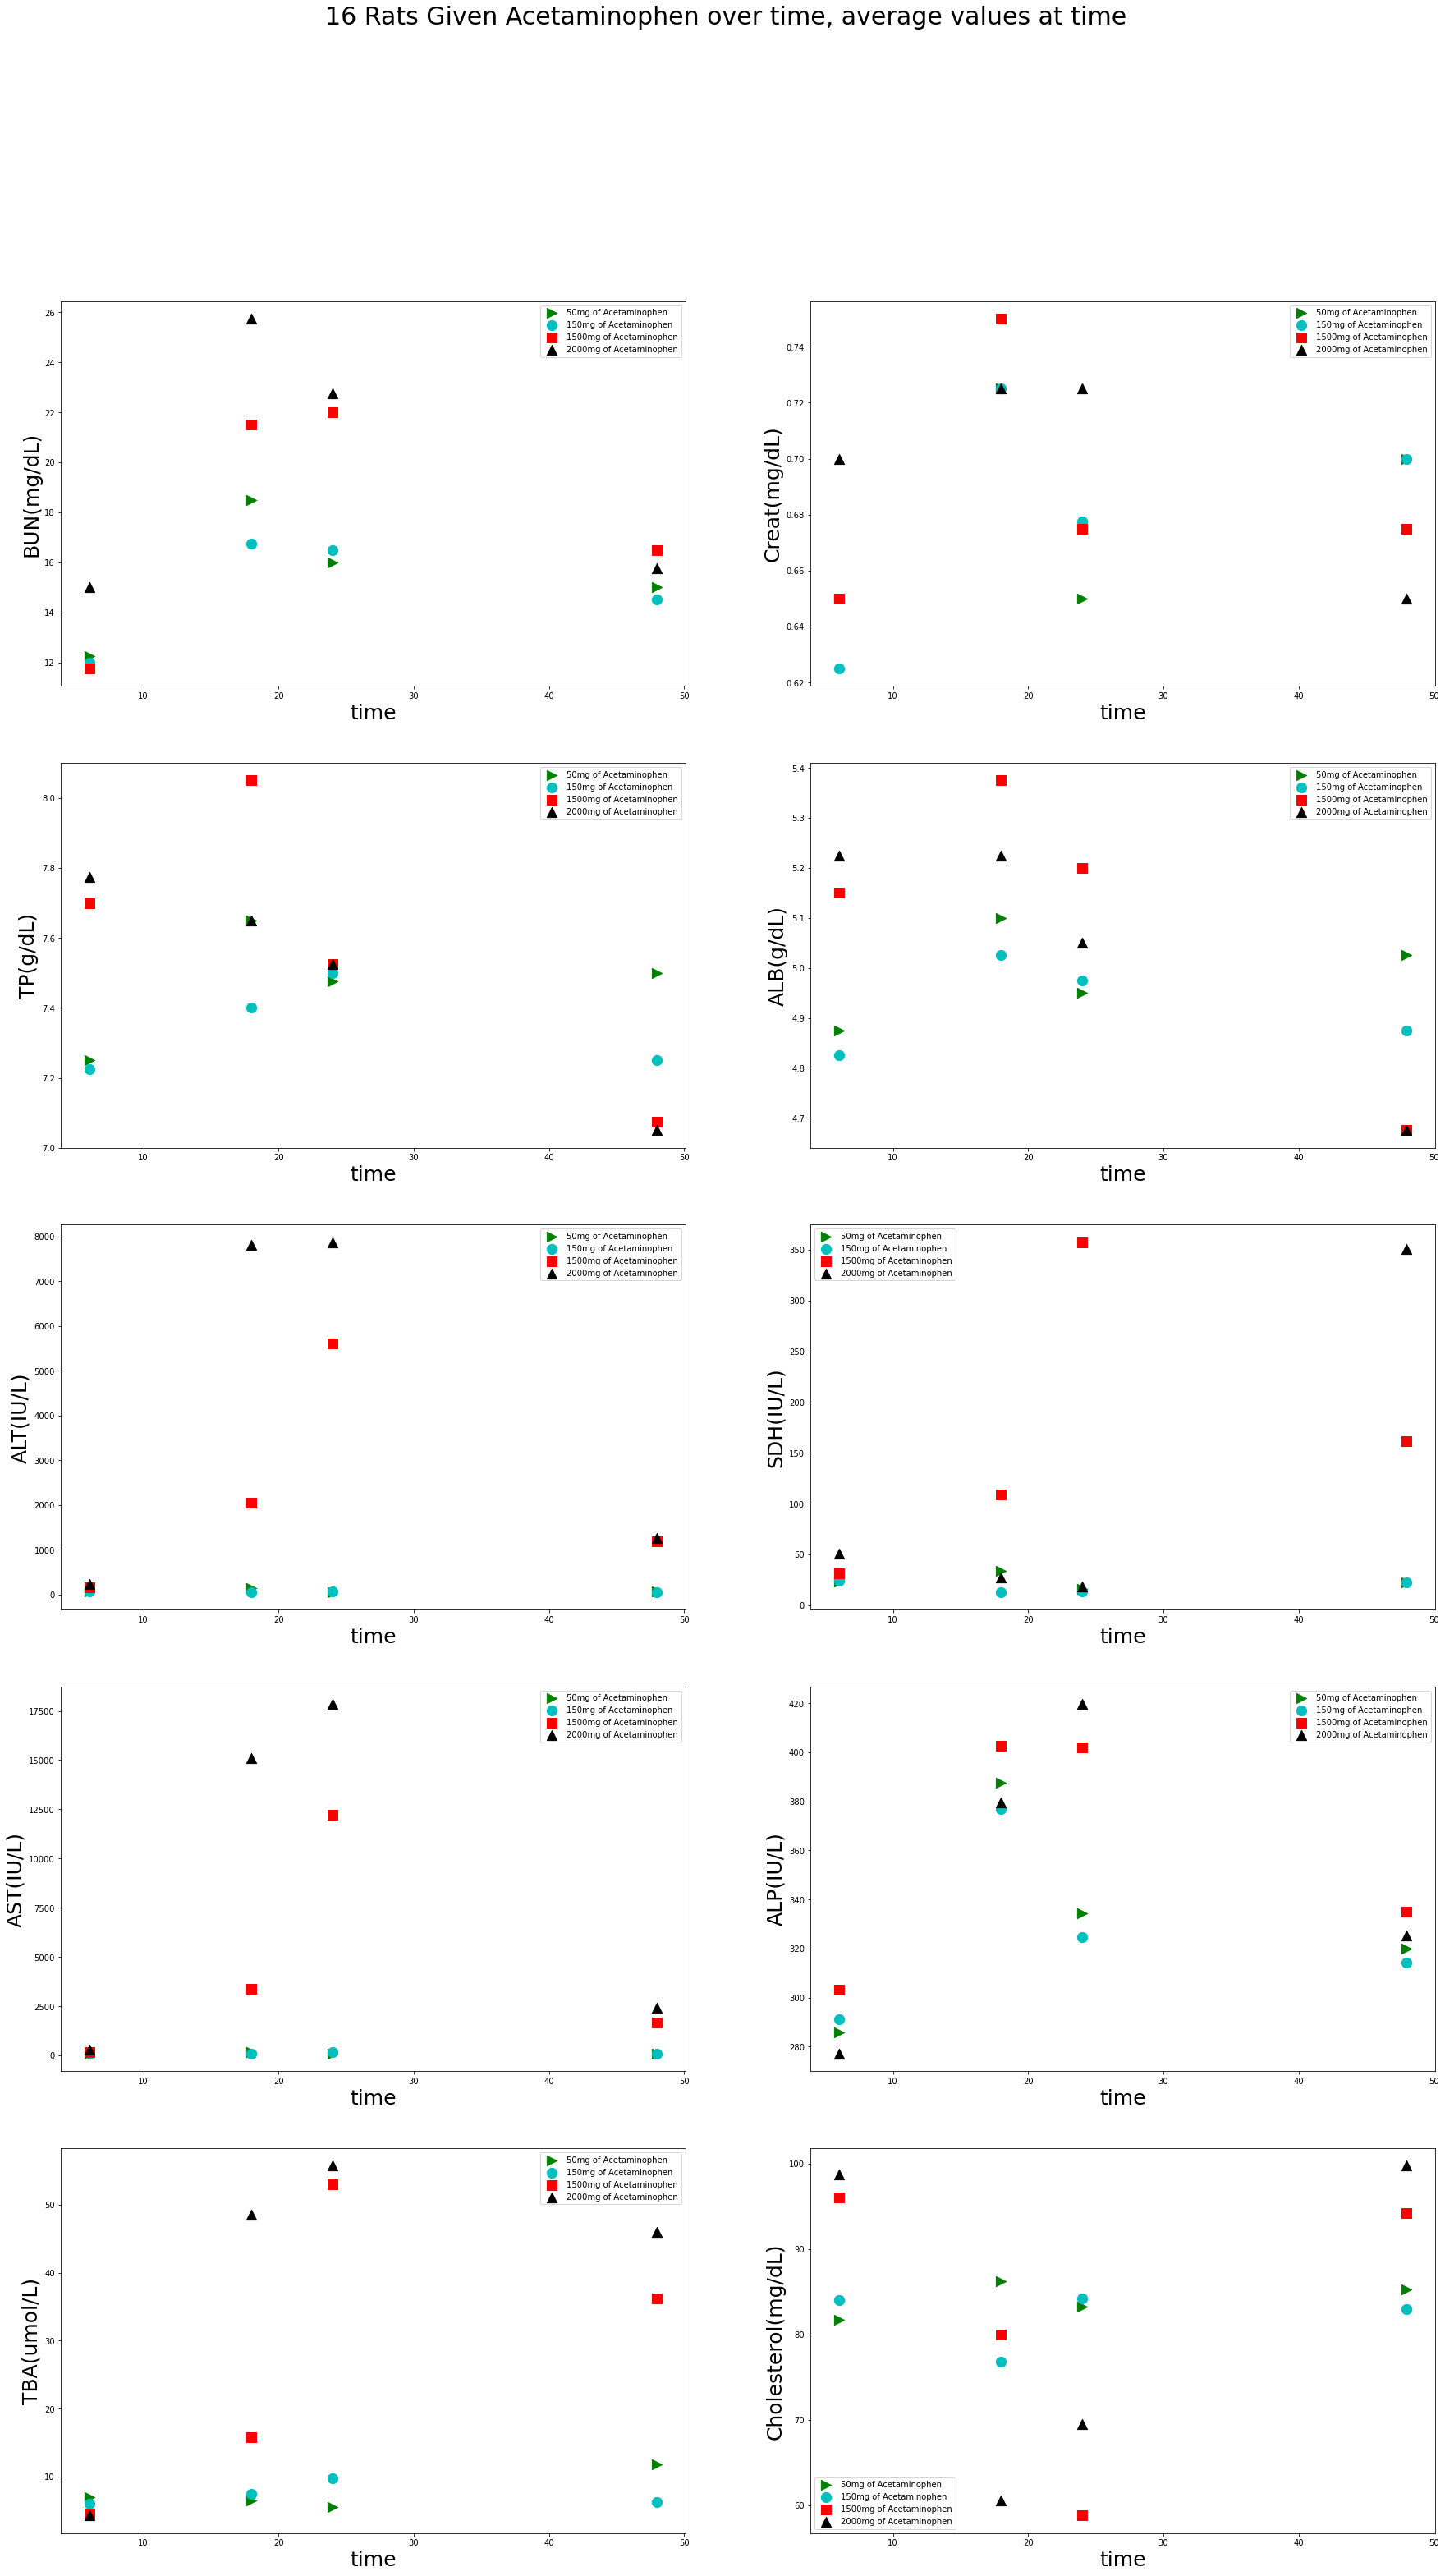

In [27]:
t1 = [6,18,24,48] # new time vector since we now only have 1 averaged value for each time group per dose group
plt.figure(figsize = (30,50))
for i in range(num_cols): # everything here is the same as before except only 16 rows 
    plt.subplot(5,2,i+1)
    plt.scatter(t1, averaged_data[12:16,i],marker = '>', color = 'g', s = 150, label='50mg of Acetaminophen')
    plt.scatter(t1, averaged_data[0:4,i],marker = 'o', color = 'c',s = 150, label='150mg of Acetaminophen')
    plt.scatter(t1, averaged_data[4:8,i], marker = ',', color = 'r',s = 150, label='1500mg of Acetaminophen')
    plt.scatter(t1, averaged_data[8:12,i], marker = '^', color = 'k',s = 150, label='2000mg of Acetaminophen')
    
    
    plt.legend()
    plt.ylabel(labelsyaxis[i], fontsize = 25 )
    plt.xlabel('time', fontsize = 25)
    
plt.suptitle('16 Rats Given Acetaminophen over time, average values at time', fontsize = 30)
plt.legend()
plt.show